<a href="https://colab.research.google.com/github/yuliuspune15/Tugas-AVD/blob/main/Yulius_Pune'__2409116110.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Checkpoint 1

##Business Understanding

Tujuan utama dari proyek ini adalah untuk membangun model prediksi harga laptop berdasarkan spesifikasi dan fitur-fitur laptop yang tersedia dalam dataset. Dengan prediksi harga yang akurat, calon pembeli dapat memiliki gambaran yang lebih baik mengenai kisaran harga laptop sesuai kebutuhannya, serta membantu produsen dan penjual dalam menyusun strategis harga yang lebih efektif.

##Assess Situation

Industri teknologi, khususnya perangkat elektronik seperti laptop, berkembang pesat dengan banyaknya merek dan model yang terus bermunculan. Persaingan harga semakin ketat, sementara konsumen semakin selektif dalam memilih perangkat yang sesuai anggaran dan kebutuhannya. Dengan memahami pola harga dari spesifikasi laptop, kita bisa mengidentifikasi faktor-faktor utama yang mempengaruhi harga, serta mendukung pengambilan keputusan yang lebih cerdas bagi semua pihak terkait.

##Data Mining Goals

Tujuan data mining dari proyek ini adalah membangun model Machine Learning yang mampu memprediksi harga laptop berdasarkan fitur-fitur seperti merek, ukuran layar, tipe prosesor, kapasitas RAM, jenis penyimpanan, dan fitur lainnya. Dengan hasil prediksi ini, kita juga bisa menemukan hubungan antara spesifikasi dengan harga pasar.

##Project Plan

Proyek ini akan dilaksanakan melalui beberapa tahapan:

-Pemilihan dataset yang relevan

-Pembersihan dan eksplorasi data

-Analisis korelasi antar fitur

-Pemilihan model prediksi yang sesuai

-Training dan evaluasi model

-Dokumentasi dan visualisasi hasil

Data Understanding

#Chackpoint 2

###Dataset yang digunakan pada analisis ini adalah "Laptop Price Prediction", data ini bersumber dari Kaggle yang berisi berbagai spesifikasi laptop dan harga yang dapat digunakan untuk analisis dan pemodelan prediktif.

###Sumber Dataset: https://www.kaggle.com/datasets/eslamelsolya/laptop-price-prediction

##Struktur Data

###Berikut merupakan struktur data dari database ini:
1.   Company: Merek atau produsen laptop.
2.   TypeName: Jenis laptop(misalnya,Ultabook,Gaming,Notebook).
3.   Inches: Ukuran layar dalam inci.
4.   ScreenResolution: Resolusi layar laptop.
5.   CPU: Jenis dan model prosesor.
6.   Ram: Kapasitas RAM.
7.   Memory: Kapasitas dan tipe penyimpanan (HDD/SSD).
8.   GPU: Jenis dan model kartu grafis.
9    OpSys: Sistem operasi yang digunakan.
10.  Weight: Berat laptop.
11.  Price_euros: Harga laptop dalam Euro.


## Informasi Data

In [16]:
import pandas as pd
df = pd.read_csv("/content/laptop_data.csv")
df


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


##Melihat Missing Value pada dataset

In [17]:
print((df.isna().sum() / len(df)) * 100)

Unnamed: 0          0.0
Company             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price               0.0
dtype: float64


###dari hasil analisis tidak ditemukan missing value/nilai hilang

##Duplicated Values

In [18]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

  results_df = pd.DataFrame(results)
  results_df.set_index('Kolom', inplace=True)
  results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

  display(results_df)

Kolom,Persentase Outliers
Unnamed: 0,0.0


Kolom,Persentase Outliers
Unnamed: 0,0.000000
Inches,2.993093


Kolom,Persentase Outliers
Unnamed: 0,0.000000
Inches,2.993093
Price,2.225633


In [19]:
print((df.isna().sum() / len(df)) * 100)

Unnamed: 0          0.0
Company             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price               0.0
dtype: float64


Melakukan pengecekan nilai kosong pada kolom total waste food

In [20]:
df[df['Price'].isnull()]

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


Melakukan pengecekan nilai kosong pada estimasi Price

In [21]:
df[df['Weight'].isnull()]

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


##Mengatasi Missing Values

##Penanganan Missing Values dilakukan dengan dua cara, yaitu imputasi dan dihapus, dengan catatan:

Dihapus jika data yang hilang atau tidak terbaca mencapai >= 70%
Dapat dihapus atau diimputasi apabila data yang hilang masih <=70%, diimputasi dengan cara mengisi data yang kosong menggunakan mean, median, modus dari kolom terkait

##Melakukan Imputasi

###Di sini kita akan melakukan imputasi pada kolom Inches

In [22]:
df['Inches'].dropna().describe()

,Inches
count,1303.000000
mean,15.017191
std,1.426304
min,10.100000
25%,14.000000
50%,15.600000
75%,15.600000
max,18.400000


###Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean dari kolom Total_Food_Waste_kg untuk imputasi nilai kosong tersebut

In [23]:
df['Inches'] = df['Inches'].fillna(df['Inches'].dropna().mean())

##Menghapus Missing Values

###Disini kita akan menghapus kolom Estimasi_Kerugian_Rp dengan beberapa kondisim:

Karena presentase data yang Memiliki kondisi yang memungkinkan untuk dihapus

In [25]:
# Check if the column 'Estimasi_Kerugian_Rp' exists before trying to drop it.
if 'Estimasi_Kerugian_Rp' in df.columns:
    df = df.drop('Estimasi_Kerugian_Rp', axis=1)
else:
    print("Column 'Estimasi_Kerugian_Rp' not found in DataFrame.")

Column 'Estimasi_Kerugian_Rp' not found in DataFrame.


In [26]:
df


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [27]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Unnamed: 0,0.0
Company,0.0
TypeName,0.0
Inches,0.0
ScreenResolution,0.0
Cpu,0.0
Ram,0.0
Memory,0.0
Gpu,0.0
OpSys,0.0


##Duplicated Values

###Duplicated Values adalah sebuah kondisi dimana ada data yang muncul beberapa kali dalam satu data set.

###Cara penanganannya adalah dengan menghapus semua duplikasi

In [28]:
df[df.duplicated()]

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [29]:
df = df.drop_duplicates()

In [30]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


##Outliers

###Outliers adalah nilai yang jauh berbeda dari nilai lainnya dalam dataset. Nilai Outlier bisa jauh lebih rendah atau lebih tinggi. Outlier bisa terjadi karena berbagai alasan seperti faktor kesalahan maupun kejadian lain yang tidak terduga.

###Melakukan pengecekan outliers

In [31]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Unnamed: 0,0.000000
Inches,2.993093
Price,2.225633


In [32]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


###Dikarenakan presentase yang tidak terlalu tinggi namun merupakan variable yang penting, maka dilakukan imputasi dengan metode yang paling sesuai, yaitu Winsorizing karena tetap mempertahankan struktur data tanpa membuang nilai ekstrem

###Melakukan imputasi

In [33]:
columns_to_impute = ["Inches", "Price"]

for col in columns_to_impute:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menggunakan .loc[] agar tidak muncul SettingWithCopyWarning
    df.loc[:, col] = df[col].clip(lower=lower_bound, upper=upper_bound)

##Melakukan pengecekan ulang

In [34]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Unnamed: 0,0.0
Inches,0.0
Price,0.0


In [35]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


##Incosistent Value

###Sebenarnya penanganan incosistent values bisa dilakukan secara manual, namun disini akan diberikan contoh penggunaan pandas dalam menangani insosistent values

In [36]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


##Data Reduction

In [ ]:
df = df.drop('Weight', axis=1)

In [37]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


#Checkpoint 3 - Matplotlib & Seaborn


##Import Library

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Membaca Data

In [42]:
df = pd.read_csv("/content/laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


##Bar Chart

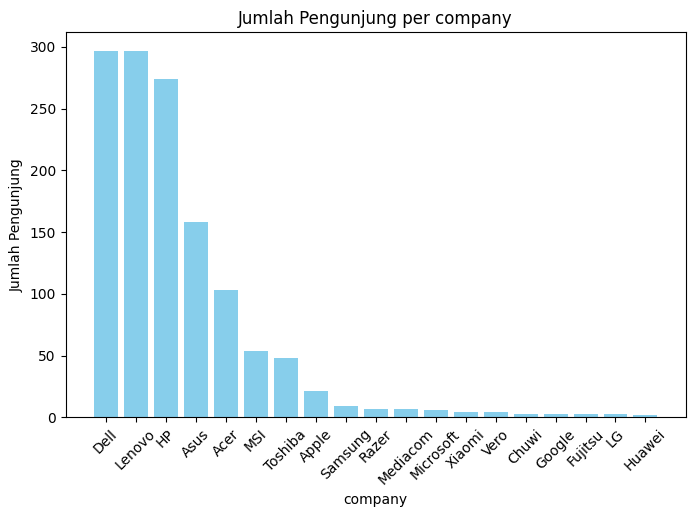

In [43]:
# Bar Chart (Matplotlib): Jumlah Pengunjung per Fakultas
plt.figure(figsize=(8, 5))
# Changed 'company' to 'Company' to match the actual column name in the DataFrame
plt.bar(df['Company'].value_counts().index, df['Company'].value_counts().values, color='skyblue')
plt.title('Jumlah Pengunjung per company')
plt.xlabel('company')
plt.ylabel('Jumlah Pengunjung')
plt.xticks(rotation=45)
plt.show()

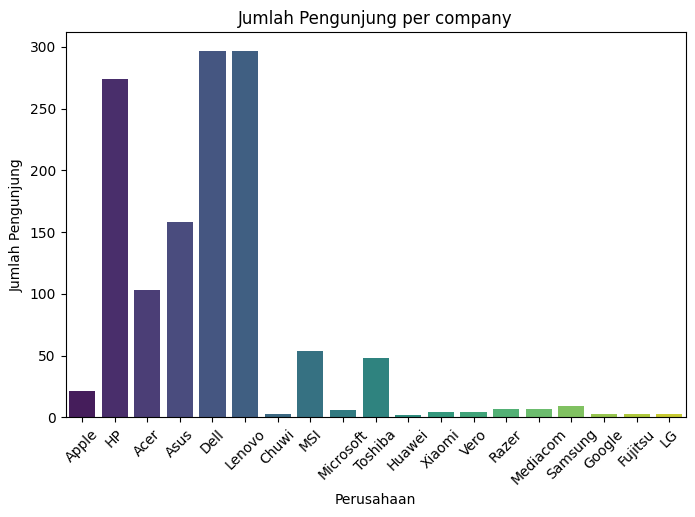

In [86]:
# Bar Chart (Seaborn)
plt.figure(figsize=(8, 5))
# Changed 'faculty' to 'Company' to match the actual column name in the DataFrame
sns.countplot(x='Company', data=df, hue="Company", palette='viridis')
plt.title('Jumlah Pengunjung per company')  # Changed title to reflect the 'Company' column
plt.xlabel('Perusahaan')  # Changed x-axis label to 'Company'
plt.ylabel('Jumlah Pengunjung')
plt.xticks(rotation=45)
plt.show()

##Pie Chart

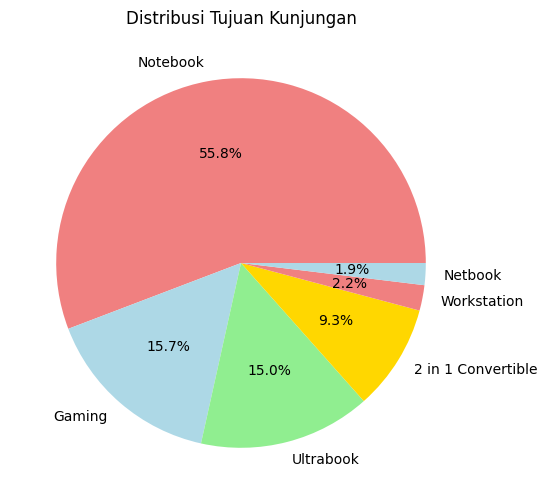

In [87]:
# Pie Chart (Matplotlib): Distribusi Tujuan Kunjungan
plt.figure(figsize=(6, 6))
plt.pie(df['TypeName'].value_counts(), labels=df['TypeName'].value_counts().index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'gold'])
plt.title('Distribusi Tujuan Kunjungan')
plt.show()

##Line Chart

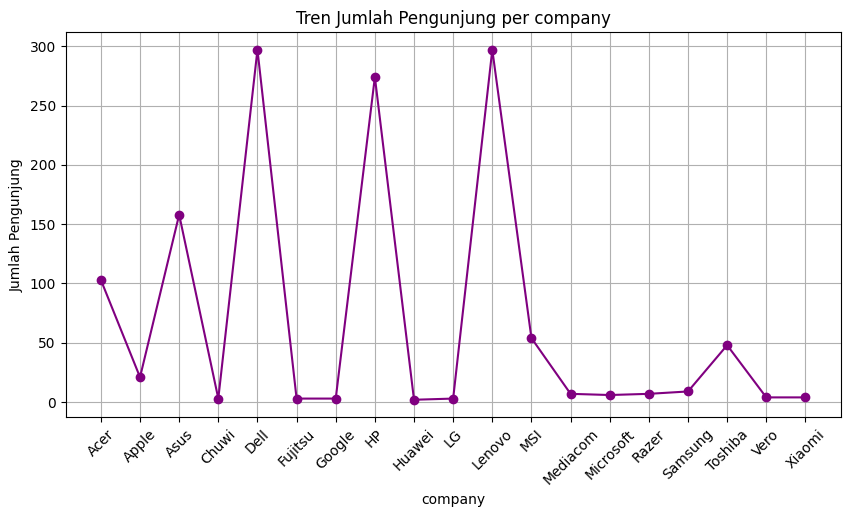

In [88]:
# Line Chart (Matplotlib): Tren Jumlah Pengunjung per Hari
df_visits_per_day = df.groupby('Company').size()
plt.figure(figsize=(10, 5))
plt.plot(df_visits_per_day.index, df_visits_per_day.values, marker='o', color='purple')
plt.title('Tren Jumlah Pengunjung per company')
plt.xlabel('company')
plt.ylabel('Jumlah Pengunjung')
plt.grid()
plt.xticks(rotation=45)
plt.show()

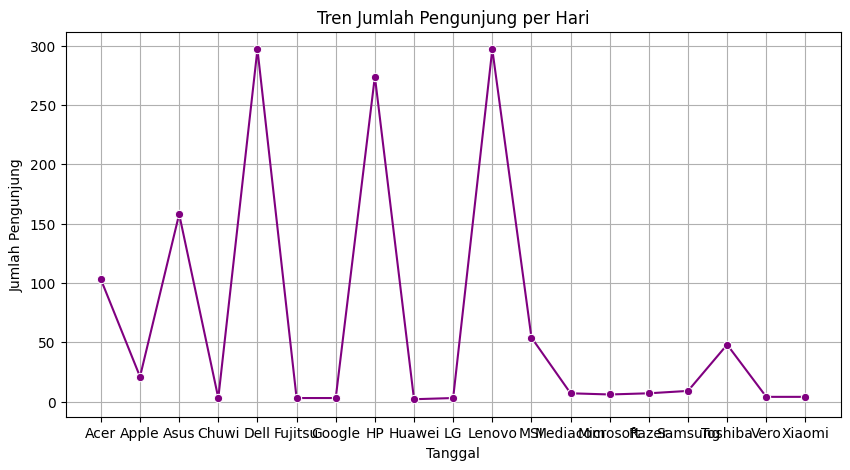

In [89]:
# Line Chart (Seaborn)
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_visits_per_day.index, y=df_visits_per_day.values, marker='o', color='purple')
plt.title('Tren Jumlah Pengunjung per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengunjung')
plt.grid()
plt.show()

##Histogram

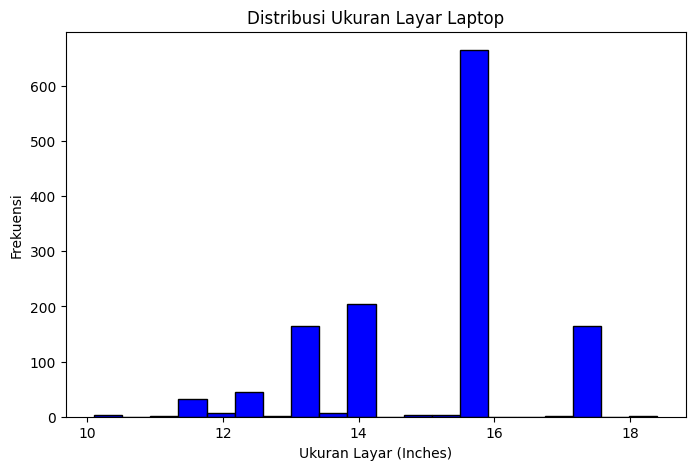

In [90]:
# Histogram (Matplotlib): Distribusi Ukuran Layar Laptop
plt.figure(figsize=(8, 5))
plt.hist(df['Inches'], bins=20, color='blue', edgecolor='black')
plt.title('Distribusi Ukuran Layar Laptop')
plt.xlabel('Ukuran Layar (Inches)')
plt.ylabel('Frekuensi')
plt.show()

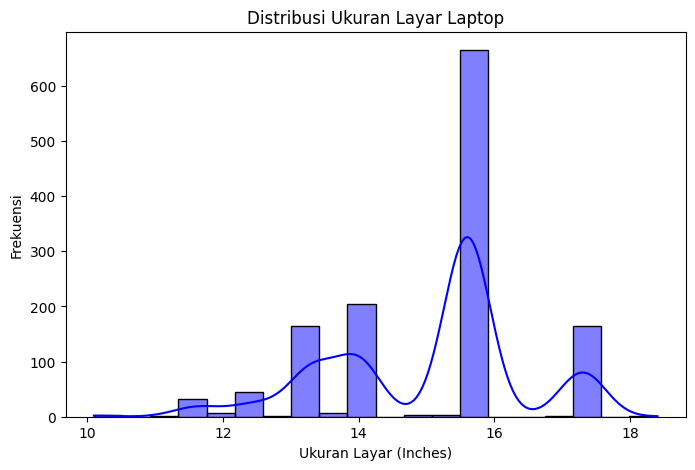

In [91]:
# Histogram (Seaborn): Distribusi Ukuran Layar Laptop
plt.figure(figsize=(8, 5))
sns.histplot(df['Inches'], bins=20, kde=True, color='blue')
plt.title('Distribusi Ukuran Layar Laptop')
plt.xlabel('Ukuran Layar (Inches)')
plt.ylabel('Frekuensi')
plt.show()

##Box Plot

<Figure size 1000x500 with 0 Axes>

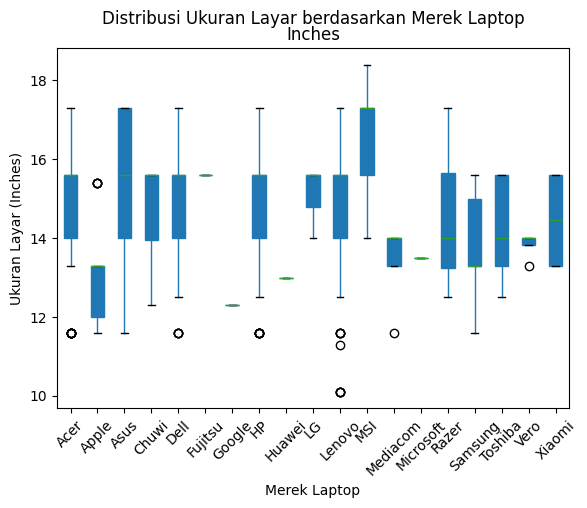

In [92]:
# Boxplot (Matplotlib): Distribusi Ukuran Layar berdasarkan Merek Laptop
plt.figure(figsize=(10, 5))
df.boxplot(column='Inches', by='Company', grid=False, patch_artist=True)
plt.suptitle('Distribusi Ukuran Layar berdasarkan Merek Laptop')
plt.xlabel('Merek Laptop')
plt.ylabel('Ukuran Layar (Inches)')
plt.xticks(rotation=45)
plt.show()


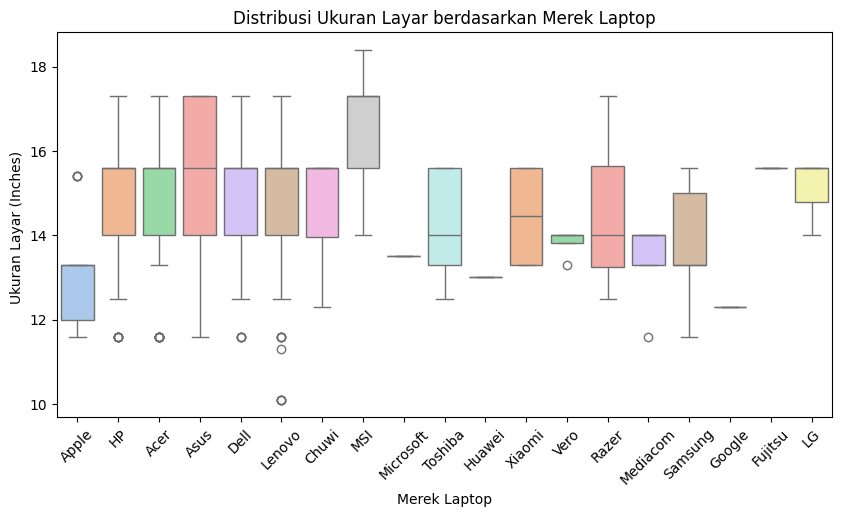

In [93]:
# Boxplot (Seaborn)
plt.figure(figsize=(10, 5))
sns.boxplot(x='Company', y='Inches', hue='Company', data=df, palette='pastel')
plt.title('Distribusi Ukuran Layar berdasarkan Merek Laptop')
plt.xlabel('Merek Laptop')
plt.ylabel('Ukuran Layar (Inches) ')
plt.xticks(rotation=45)
plt.show()

##Scatter Plot

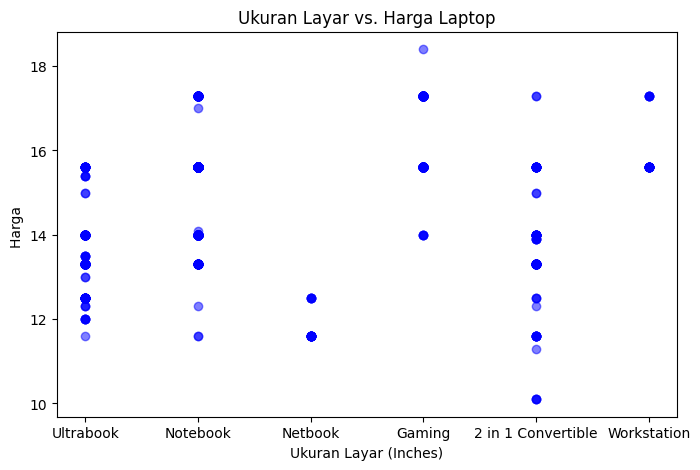

In [94]:
# Scatter Plot (Matplotlib): Durasi vs. Jumlah Buku Dipinjam
plt.figure(figsize=(8, 5))
plt.scatter(df['TypeName'], df['Inches'], c='blue', alpha=0.5)
plt.title('Ukuran Layar vs. Harga Laptop')
plt.xlabel('Ukuran Layar (Inches)')
plt.ylabel('Harga ')
plt.show()

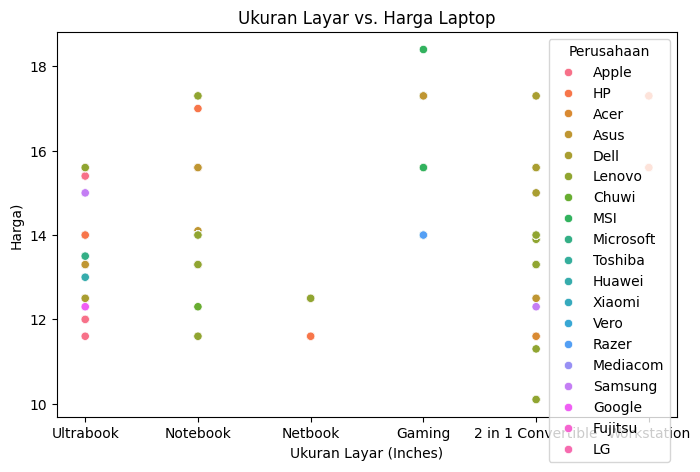

In [95]:
# Scatter Plot (Seaborn)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='TypeName', y='Inches', hue='Company', data=df)
plt.title('Ukuran Layar vs. Harga Laptop')
plt.xlabel('Ukuran Layar (Inches)')
plt.ylabel('Harga)')
plt.legend(title='Perusahaan')
plt.show()

##Heatmap

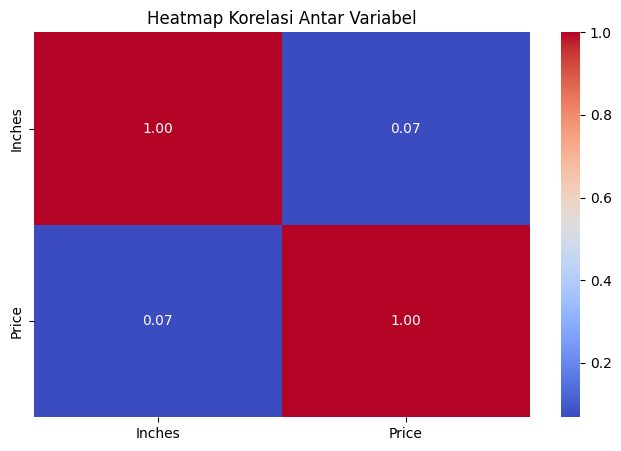

In [96]:
# Heatmap (Seaborn): Korelasi Antar Variabel Numerik
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Inches', 'Price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

##Contoh penggunaan groupby untuk Bar Chart

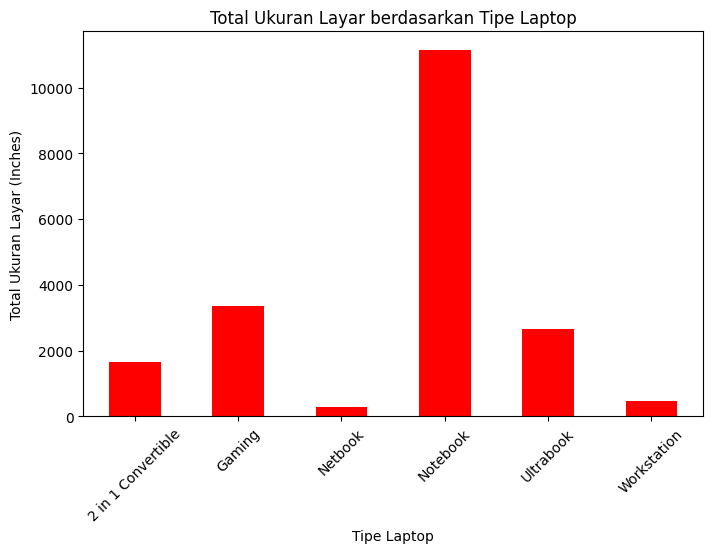

In [97]:
# Bar Chart (Matplotlib): Jumlah Pengunjung per Fakultas
plt.figure(figsize=(8, 5))
df.groupby('TypeName')['Inches'].sum().plot(kind='bar', color='red')
plt.title('Total Ukuran Layar berdasarkan Tipe Laptop')
plt.xlabel('Tipe Laptop')
plt.ylabel('Total Ukuran Layar (Inches)')
plt.xticks(rotation=45)
plt.show()